# Test on Fountain

In [1]:
import sys,os
sys.path.append('python-code')
from utils import *
from init_camera import initialize
from register_camera import register
import seaborn as sns

In [2]:
def init():
    ################################################
    # initialize configuration and camera dictionary
    ################################################
    k1=0
    k2=0
    path='matlab-code/data/k/K.txt'
    f=open(path,'r')
    lines=f.readlines()
    K=np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            K[i,j]=float(lines[i].split(' ')[j])

    DIR_IMAGES='matlab-code/data/images/*.png'
    config=SFM_Params(DIR_IMAGES,hessianThreshold=1000,detector='SIFT',matcher='FLANN')
    dict_cameras={}
    n_cameras=config.n_cameras
    for i in range(n_cameras):
        dict_cameras[i]={}
    
    config.K=K
    config.DISTCOEFFS=np.array([k1,k2,0,0]).astype('float32')
    
    config.ratio_test_threshold=0.65
    config.pnp_threshold = 5
    config.dist_threshold=100
    config.post_threshold=5
    config.pre_threshold=24
    config.indice_registered_cameras=[]
    
    return config,dict_cameras

Loaded in total 11 frames 
Feature detection takes 8 seconds
Feature matching takes 8 seconds
`ftol` termination condition is satisfied.
Function evaluations 26, initial cost 7.4554e+03, final cost 6.0945e+01, first-order optimality 3.80e+00.
Use camera 4 and camera 5 to initialize, 1912 pairs used, 1502 pairs reconstructed 
-----------------------------------
Registering 3th camera............
Use 956 out of 959 points to register camera 6 by camera 5
`ftol` termination condition is satisfied.
Function evaluations 27, initial cost 1.5859e+03, final cost 3.6940e+02, first-order optimality 5.13e+01.
6415 observations, 2628 3D points
-----------------------------------
Registering 4th camera............
Use 1172 out of 1181 points to register camera 7 by camera 6
`ftol` termination condition is satisfied.
Function evaluations 17, initial cost 9.1227e+02, final cost 6.9995e+02, first-order optimality 4.83e+01.
9291 observations, 3402 3D points
-----------------------------------
Registeri

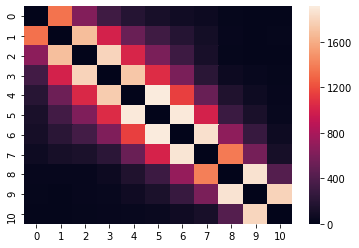

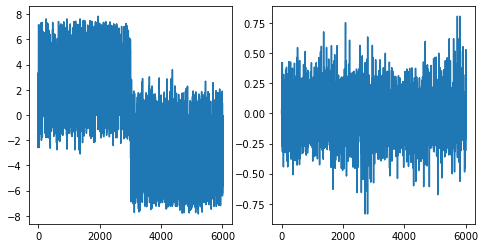

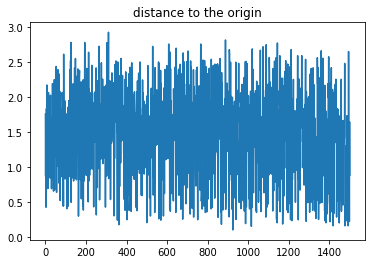

In [3]:
SAVE_NAME='fountain'
if(not os.path.exists('results/%s' % SAVE_NAME)):
    os.makedirs('results/%s' % SAVE_NAME)
########################################################
# init configurations 
########################################################
config,dict_cameras=init()



########################################################
# load images
########################################################
dict_cameras=load_images(config,dict_cameras)



########################################################
# extract features
########################################################
dict_cameras=extract_features(config,dict_cameras)



########################################################
# match features
########################################################
dict_cameras=match_features(config,dict_cameras)
ax = sns.heatmap(config.n_good_matches)



########################################################
# initialize the first two images
########################################################
config,dict_cameras=initialize(config,dict_cameras)
np.savetxt('results/fountain/2.txt',config.reconstructed_points_3d,delimiter=';')



########################################################
# register more cameras
########################################################
n_cameras=config.n_cameras
for i in range(n_cameras-2):
    print('---------------------------------------------------------------------------------------')
    print('Registering %dth camera............' % (i+3))
    config,dict_cameras,n_observations,n_points_3d=register(config,dict_cameras)
    print('%d observations, %d 3D points' %(n_observations,n_points_3d))

    mask=[]
    for crn_camera_index in config.indice_registered_cameras:
        mask.extend(dict_cameras[crn_camera_index]['point_indice'].tolist())
    mask=list(set(mask))
    reconstructed_points_3d=config.reconstructed_points_3d[mask]
    np.savetxt('results/%s/%d.txt' % (SAVE_NAME,i+3),reconstructed_points_3d,delimiter=';')